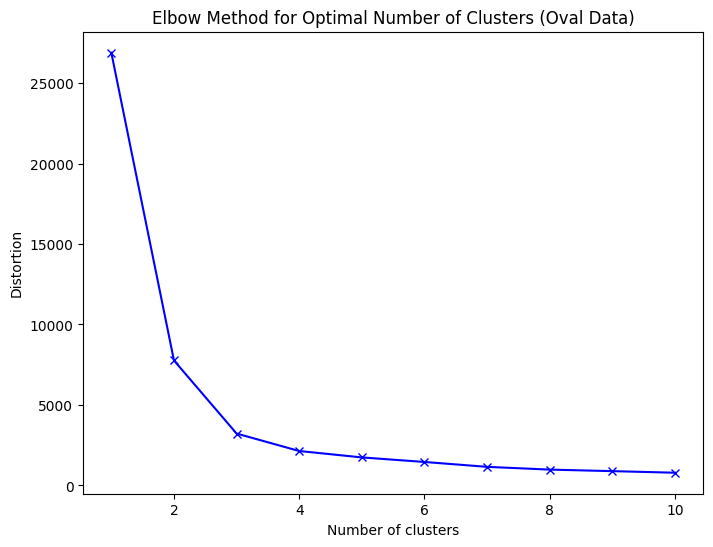

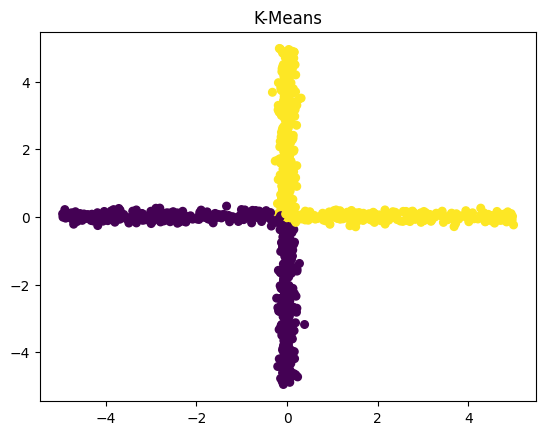

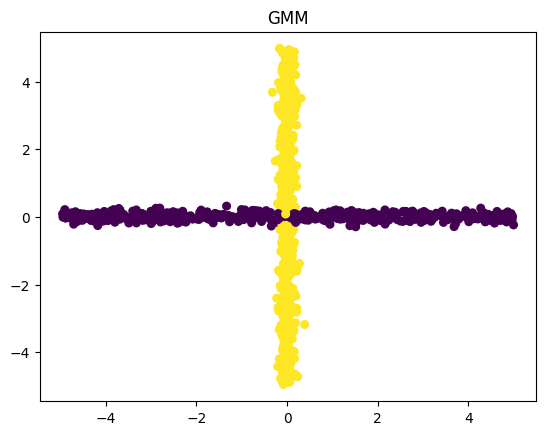

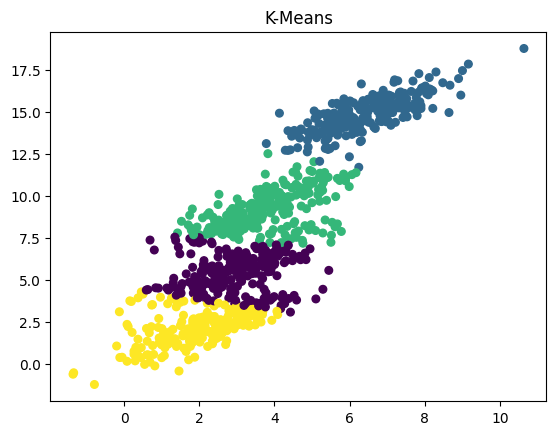

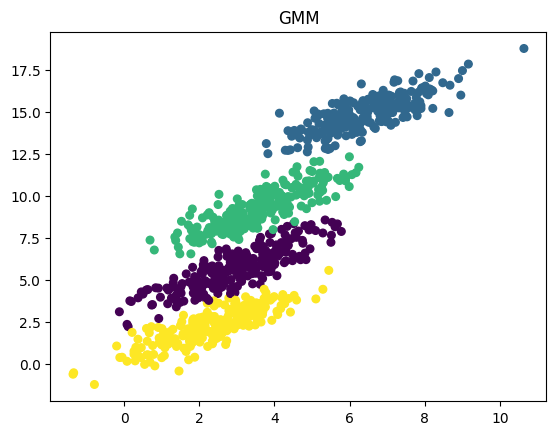

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to create data distributed in a plus shape
def create_plus_data():
    np.random.seed(42)
    n_samples = 500
    
    x1 = np.random.normal(loc=0, scale=0.1, size=(n_samples, 1))
    y1 = np.random.uniform(low=-5, high=5, size=(n_samples, 1))
    
    x2 = np.random.uniform(low=-5, high=5, size=(n_samples, 1))
    y2 = np.random.normal(loc=0, scale=0.1, size=(n_samples, 1))
    
    X1 = np.hstack((x1, y1))
    X2 = np.hstack((x2, y2))
    
    X = np.vstack((X1, X2))
    y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))
    
    return X, y

# Function to create data distributed in flattened oval shapes
def create_oval_data():
    np.random.seed(42)
    n_samples = 1000
    centers = [[-6, 5], [-4, 3], [-2, 2], [0, 1]]
    cluster_std = [0.5, 0.5, 0.5, 0.5]
    
    X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)
    
    # Apply a linear transformation to obtain flattened and oriented ellipses
    angle = np.pi / 4  # 45 degrees
    stretch_factor = 3
    transformation_matrix = np.array([[np.cos(angle), -np.sin(angle)], 
                                      [np.sin(angle) * stretch_factor, np.cos(angle) * stretch_factor]])
    X = X.dot(transformation_matrix)
    
    return X, y

# Generate the data
X_plus, y_plus = create_plus_data()
X_oval, y_oval = create_oval_data()

# Function to apply and compare GMM and K-Means
def compare_gmm_kmeans(X, n_clusters, covariance_type):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    gmm = GaussianMixture(n_components=n_clusters, random_state=42, covariance_type=covariance_type)
    
    kmeans_labels = kmeans.fit_predict(X)
    gmm_labels = gmm.fit_predict(X)
    
    return kmeans_labels, gmm_labels, kmeans

# Function to calculate distortion for KMeans for a range of cluster values
def calculate_elbow_curve(X, max_clusters=10):
    distortions = []
    K = range(1, max_clusters + 1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    
    return K, distortions

# Calculate and display the Elbow Diagram for oval data
K, distortions = calculate_elbow_curve(X_oval, max_clusters=10)

plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal Number of Clusters (Oval Data)')
plt.show()

optimal_clusters = 4  # based on the Elbow graph

# Comparison on data distributed in a plus shape
kmeans_labels_plus, gmm_labels_plus, _ = compare_gmm_kmeans(X_plus, 2, 'diag')
# Comparison on data distributed in oval shape with optimal number of clusters
kmeans_labels_oval, gmm_labels_oval, KMeans_model = compare_gmm_kmeans(X_oval, optimal_clusters, 'tied')

# Plot the results
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')
    plt.title(title)
    plt.show()

# Plot for plus-shaped data
plot_clusters(X_plus, kmeans_labels_plus, "K-Means")
plot_clusters(X_plus, gmm_labels_plus, "GMM")

# Plot for oval-shaped data
plot_clusters(X_oval, kmeans_labels_oval, "K-Means")
plot_clusters(X_oval, gmm_labels_oval, "GMM")


In [2]:
KMeans_model.cluster_centers_

array([[ 2.95271194,  5.42207806],
       [ 6.39007492, 14.85801503],
       [ 3.81377684,  9.2128082 ],
       [ 1.84928576,  2.05342807]])

<Axes: >

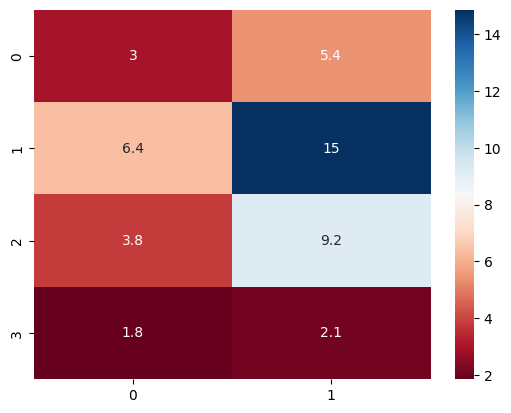

In [3]:
import seaborn as sns
sns.heatmap(KMeans_model.cluster_centers_, cmap="RdBu", annot=True)

<Axes: >

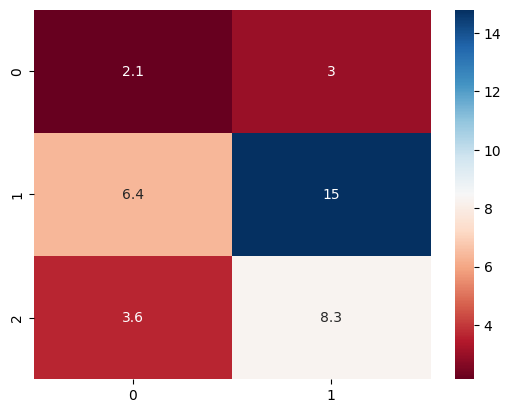

In [4]:
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3.fit(X_oval)
sns.heatmap(kmeans3.cluster_centers_, cmap="RdBu", annot=True)

In [5]:
import pandas as pd
df_oval = pd.DataFrame(X_oval)


In [6]:
df_oval.describe()

,0,1
count,1000.000000,1000.000000
mean,3.784482,8.003657
std,1.939261,4.811678
min,-1.356298,-1.207287
25%,2.350883,3.907274
50%,3.511215,7.622987
75%,5.190378,12.031038
max,10.632497,18.753584
